In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.colors as colors
#from partials import zintegral_fast, restrate_Ia, sigOM0sqinv
from matplotlib import ticker, cm
from astropy.cosmology import FlatLambdaCDM
import scipy.integrate as integrate
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import sys
#sys.path.insert(1, '/Users/akim/project/PeculiarVelocity/doc/src/')

import partials_fD2 

In [2]:
cov,z,fD = partials_fD2.set1(useGW=True)

[[[ 3.98099824e-04 -2.02683053e-08 -2.83696194e-07  4.52481451e-06]
  [-2.02683053e-08  1.05498822e-04  5.40943607e-08 -8.62778397e-07]
  [-2.83696194e-07  5.40943607e-08  9.16633494e-05 -1.20763401e-05]
  [ 4.52481451e-06 -8.62778397e-07 -1.20763401e-05  1.92611674e-04]]]
[0.05 0.15 0.25] [0.53101399 0.55467625 0.56988571]


In [4]:
err=[]
for  i in range(3): err.append(np.sqrt(cov[0][i,i]))

In [5]:
fD_var_SN = partials_fD2.set1(useGW=False)

[[[ 8.69701634e-05 -4.50044100e-08 -2.14324255e-06  3.68225007e-06]
  [-4.50044100e-08  5.62436376e-05  9.74714269e-08 -1.67463159e-07]
  [-2.14324255e-06  9.74714269e-08  6.32988333e-05 -7.97508885e-06]
  [ 3.68225007e-06 -1.67463159e-07 -7.97508885e-06  1.37017957e-05]]]
[0.05 0.15 0.25] [0.53101399 0.55467625 0.56988571]


In [7]:
covSN,z,fD = fD_var_SN
errSN=[]
for  i in range(3): errSN.append(np.sqrt(covSN[0][i,i]))

In [12]:
def plt_style():
    plt.rcParams.update({
                        'lines.linewidth':1.0,
                        'lines.linestyle':'-',
                        'lines.color':'black',
                        'font.family':'serif',
                        'font.weight':'normal',
                        'font.size':13.0,
                        'text.color':'black',
                        'text.usetex':True,
                        'axes.edgecolor':'black',
                        'axes.linewidth':1.0,
                        'axes.grid':False,
                        'axes.titlesize':'x-large',
                        'axes.labelsize':'x-large',
                        'axes.labelweight':'normal',
                        'axes.labelcolor':'black',
                        'axes.formatter.limits':[-4,4],
                        'xtick.major.size':7,
                        'xtick.minor.size':4,
                        'xtick.major.pad':8,
                        'xtick.minor.pad':8,
                        'xtick.labelsize':'medium',
                        'xtick.minor.width':1.0,
                        'xtick.major.width':1.0,
                        'ytick.major.size':7,
                        'ytick.minor.size':4,
                        'ytick.major.pad':8,
                        'ytick.minor.pad':8,
                        'ytick.labelsize':'medium',
                        'ytick.minor.width':1.0,
                        'ytick.major.width':1.0,
                        'legend.numpoints':1,
                        #'legend.fontsize':'x-large',
                        'legend.shadow':False,
                        'legend.frameon':False})


# These are the "Tableau 20" colors as RGB.
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)




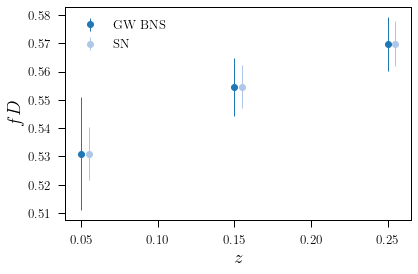

In [16]:
plt_style()
plt.errorbar(z,fD, yerr=err, fmt='o', label='GW BNS',c=tableau20[0])
plt.errorbar(z+0.005,fD, yerr=errSN, fmt='o', label='SN',c=tableau20[1])
plt.ylabel('$fD$')
plt.xlabel('$z$')
plt.legend()

plt.tight_layout()
plt.savefig('fD.png',dpi=250)